## DSE312-Computer Vision Practise session2: 
$  27th \space August \space 2022$    

1. Find the value of $f(2)$ using linear interpolation method. Given
that $f(0) = 2$ and $f(3) =5$.

Value of f(2) is:  4.0


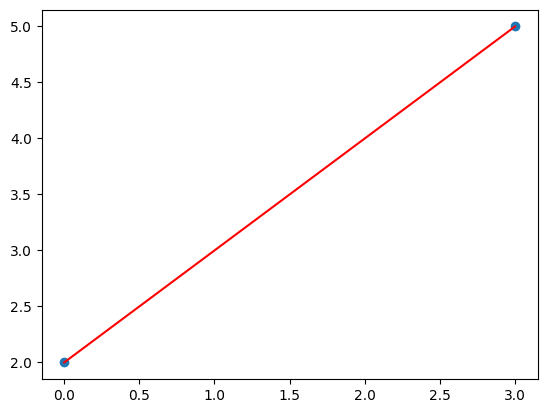

In [2]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
f = interp1d(np.array([0,3]), np.array([2,5]))
print("Value of f(2) is: ",f(2))
x = np.linspace(0,3,100)
plt.scatter(np.array([0,3]), np.array([2,5]))
plt.plot(x,f(x), 'r')
plt.show()



2. A vector $(3,2)$ is rotated around Z-axis by $30^{\circ}$ and then translated by $(5,7)$. Find the new coordinates using computer code.

In [40]:
a = np.array([3,2,1])
z_rotate_tran = np.array([
    [np.cos(np.pi/6),-np.sin(np.pi/6),5],
    [np.sin(np.pi/6),np.cos(np.pi/6),7],
    [0,0,1]
])
rot_tran_vector = z_rotate_tran@a
print(rot_tran_vector)


[ 6.59807621 10.23205081  1.        ]


3. Interpolation of a polynomial of the form: $\space p(x) = a_2x^2+ a_1x+a_0$

    Three coefficients of the parabola that passes through the
    distinct (non-collinear) points $(x_1, f(x_1)), (x_2, f(x_2)) \space and \space (x_3,
    f(x_3))$ are unique and are the solution of the system of three linear equations of the form:

    $f(x_1) = a_2x_1^2+a_1x_1+a_0$ 

    $f(x_2) = a_2x_2^2+a_1x_2+a_0$
    
    $f(x_3) = a_2x_3^2+a_1x_3+a_0$

    Write down the system of equations in the matrix form.
    Then, for a parabolic function:

    $$f(x) = \frac{x^2}{10}-2sin(x), \space given \space x_1 = 0, x_2 = 1 \space and \space x_3 = 2$$

    Write the matrix form for this specific problem. Solve for the coefficients using computer code. Predict the value of $f(x),\space at \space x =1.5$

-1.719179547331106


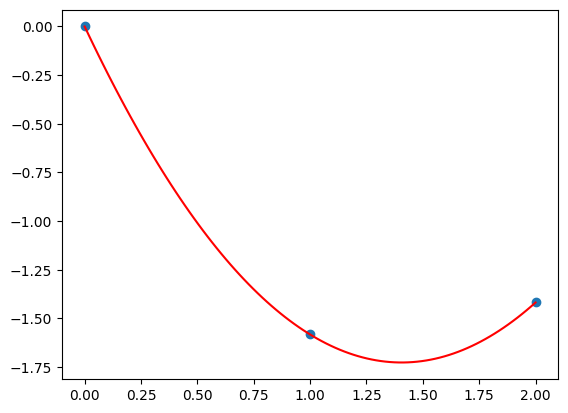

In [4]:
x = np.array([0,1,2])
x_new = np.linspace(0,2,100)
y = (x**2/10)-2*np.sin(x)
z = interp1d(x,y,kind='quadratic')
print(z(1.5))
plt.scatter(x,y)
plt.plot(x_new,z(x_new), 'r')
plt.show()

In [5]:
from scipy.optimize import curve_fit

def func(x,a_0,a_1,a_2):
    return a_0+a_1*x+a_2*x**2

popt, pcov = curve_fit(func,x_new,z(x_new))

In [6]:
for i,j in  enumerate(popt):
    print("a_{} = {:.3f} ".format(i, j))

a_0 = -0.000 
a_1 = -2.457 
a_2 = 0.874 


4. Express the point $(5,7)$ in homogeneous coordinates.
    Think about questions $5$ and $6$ regarding intersection (from our class discussion). 

In [7]:
point = np.array([5,7])
hc_point = np.array([5,7,1])

5. Fill in: Two intersecting planes always form : a. line; b. plane;
c. point?
Find the intersecting _____ for the following set of plane
equations: $2x+y−z=3$; $x-y+z=3$?
Also find a point on the _____ of intersection (hint: set $z=0$).

In [8]:
#Taking z = 0;
a = np.array([
    [2,1],
    [1,-1]
])
b = np.array([3,3])
np.linalg.solve(a,b)

array([ 2., -1.])

6. Given are two lines: $3x+2y+1=0$ and $6x+4y−2=0$.

    i. What is the relationship between these two lines in the Euclidean plane? 
    
    ii) In projective geometry, how is the point of intersection referred as? compute the point of intersection in homogeneous coordinates using computer code. Express the point in E.C. also.

i. `The two lines in euclidean plane are parallel.`

In [9]:
l_1 = np.array([3,2,1])
l_2 = np.array([6,4,-2])
Intersection_point = np.cross(l_1, l_2)
print(Intersection_point)

[-8 12  0]


7. What is the net effect of transforming an arbitrary point x of
the initial object to the corresponding point x' after the
following transformations such that
x' = Hx, where H= ABCD.

    i) Let scale in the x-direction using a scale factor 5 (i.e., making it five times larger) be matrix A

    ii) this is followed by a rotation about z-axis 30° (B).

    iii) Followed by a shear transformation in x- and y-direction with shearing factor 2 and 3, respectively (matrix C).
    
    iv) And finally by a transformation moving the point in the direction of [2, 1, 2] (matrix D) Write all the matrices using H.C. Please use computer code for finding value of H.

In [29]:
A = np.array([
    [5,0,0,0],
    [0,5,0,0],
    [0,0,5,0],
    [0,0,0,1]
])
B = np.array([
    [np.cos(np.pi/6),-np.sin(np.pi/6),0,0],
    [np.sin(np.pi/6),np.cos(np.pi/6),0,0],
    [0,0,1,0],
    [0,0,0,1]
])
C = np.array([
    [1,3,0,0],
    [2,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])
D = np.array([
    [1,0,0,2],
    [0,1,0,1],
    [0,0,1,2],
    [0,0,0,1]
])

In [30]:
H = A@B@C@D
print(H)
#Let x = [2,3,9,1] then:
x = np.array([2,3,9,1])
t_x = H@x
print()
print("Vector after transformation is: ", t_x)

[[-0.66987298 10.49038106  0.          9.15063509]
 [11.16025404 11.83012702  0.         34.15063509]
 [ 0.          0.          5.         10.        ]
 [ 0.          0.          0.          1.        ]]

Vector after transformation is:  [39.2820323  91.96152423 55.          1.        ]


8. A 3D point $A=(2,3,9)$ is translated by a vector $\begin{bmatrix} 
	8 & 0 & 5 \\
	\end{bmatrix}^T$
by
a scale factor $ =2$. Express the result in homogeneous
coordinates. Write the $4 \times 4$ matrix A of the transformation in the Homogenous coordinate system that translates point A by
the vector T.

In [32]:
A = np.array([2,3,9])
T = np.array([8,0,5])
A_hc = np.append(A,1)
translation_matrix = np.array([
    [2,0,0,8],
    [0,2,0,0],
    [0,0,2,5],
    [0,0,0,1]
])
translation_matrix@A_hc




array([12,  6, 23,  1])

9. A vector $(5,9,4)$ is rotated around Z-axis by 30° and then
rotated around Y-axis by 90° and then around X-axis by 180°. Finally is translated by $(4,-3,7)$. Find the new coordinates of the
vector. Express the final result in homogeneous coordinate.
Preferably using computer code.

In [13]:
vector = np.array([5,9,4])
vector_hc = np.append(vector,1)
z_rotate_hc = np.array([
    [np.cos(np.pi/6),-np.sin(np.pi/6),0,0],
    [np.sin(np.pi/6),np.cos(np.pi/6),0,0],
    [0,0,1,0],
    [0,0,0,1]    
    ])

x_rotate_hc = np.array([
    [1,0,0,0],
    [0,np.cos(np.pi),-np.sin(np.pi),0],
    [0,np.sin(np.pi),np.cos(np.pi),0],
    [0,0,0,1]
])
translation_matrix_hc = np.array([
    [1.,0.,0.,4.],
    [0.,1.,0.,-3.],
    [0.,0.,1.,7.],
    [0.,0.,0.,1.]
])
y_rotate_hc = np.array([
    [np.cos(np.pi/2),0.,np.sin(np.pi/2),0],
    [0.,1.,0.,0.],
    [np.sin(np.pi/2),np.cos(np.pi/2),0,0],    
    [0.,0.,0.,1.]
    ])




In [14]:
np.float16(6)

6.0

In [15]:
translation_matrix_hc@x_rotate_hc@y_rotate_hc@z_rotate_hc@vector_hc

array([  8.        , -13.29422863,   7.16987298,   1.        ])

10. From the slides `(Lectures7-8)`:
Use the points to compute projection matrix (P).
Then perform the decomposition of the projection matrix P into
intrinsic and extrinsic parameters `(follow the steps in lecture-8)`.
Use computer codes.

In [16]:
image_c = np.array([[880, 214],[43, 203],[270, 197],[886, 347],[745, 302],[943, 128],[476, 590],[419, 214],[317, 335],
[783 ,521],[235, 427],[665, 429],[655, 362],[427, 333],[412, 415],[746 ,351],[434 ,415],[525 ,234],[716 ,308],
[602 ,187]])

world_c = np.array([[312.747 ,309.140, 30.086],[305.796, 311.649, 30.356],[307.694, 312.358, 30.418,],
[310.149, 307.186, 29.298,],[311.937, 310.105, 29.216],[311.202, 307.572, 30.682],[307.106, 306.876, 28.660],
[309.317, 312.490, 30.230],[307.435, 310.151, 29.318],[308.253, 306.300, 28.881],[306.650, 309.301, 28.905],
[308.069, 306.831, 29.189],[309.671, 308.834, 29.029],[308.255, 309.955, 29.267],[307.546, 308.613, 28.963],
[311.036, 309.206, 28.913],[307.518, 308.175, 29.069],[309.950, 311.262, 29.990],[312.160, 310.772, 29.080],
[311.988, 312.709, 30.514]])


In [17]:
u = image_c[0]
x = world_c[0]
q1 = np.array([
        [x[0],x[1],x[2],1,0,0,0,0,-u[0]*x[0],-u[0]*x[1],-u[0]*x[2]],
        [0,0,0,0,x[0],x[1],x[2],1,-u[1]*x[0],-u[1]*x[1],-u[1]*x[2]]
        ])


In [18]:
for i in range(1,20):
    a = np.zeros((1,4))
    x = world_c[i]
    u = image_c[i]
    q2 = np.array([
        [x[0],x[1],x[2],1,0,0,0,0,-u[0]*x[0],-u[0]*x[1],-u[0]*x[2]],
        [0,0,0,0,x[0],x[1],x[2],1,-u[1]*x[0],-u[1]*x[1],-u[1]*x[2]]
        ])
    q1 = np.concatenate((q1,q2), axis = 0)
np.shape(q1)

(40, 11)

In [19]:
A = q1
b = image_c.flatten()


# Method 1:
`Using least square`

In [20]:
print(q1)

[[ 3.12747000e+02  3.09140000e+02  3.00860000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.75217360e+05 -2.72043200e+05 -2.64756800e+04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.12747000e+02  3.09140000e+02  3.00860000e+01  1.00000000e+00
  -6.69278580e+04 -6.61559600e+04 -6.43840400e+03]
 [ 3.05796000e+02  3.11649000e+02  3.03560000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.31492280e+04 -1.34009070e+04 -1.30530800e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.05796000e+02  3.11649000e+02  3.03560000e+01  1.00000000e+00
  -6.20765880e+04 -6.32647470e+04 -6.16226800e+03]
 [ 3.07694000e+02  3.12358000e+02  3.04180000e+01  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -8.30773800e+04 -8.43366600e+04 -8.21286000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.07694000e+02  

In [21]:
from scipy.linalg import lstsq
M = lstsq(A,b)[0]
print(M)
print(np.shape(M))

[-2.33259098e+00 -1.09993113e-01  3.37413916e-01  7.36673920e+02
 -2.31050254e-01 -4.79506029e-01  2.08717636e+00  1.53627756e+02
 -1.26379606e-03 -2.06770917e-03  5.14635233e-04]
(11,)


In [22]:
M = np.append(M,1)
print(np.shape(M))

(12,)


In [23]:
M = np.reshape(M,(3,4))
print(M)

[[-2.33259098e+00 -1.09993113e-01  3.37413916e-01  7.36673920e+02]
 [-2.31050254e-01 -4.79506029e-01  2.08717636e+00  1.53627756e+02]
 [-1.26379606e-03 -2.06770917e-03  5.14635233e-04  1.00000000e+00]]


# Method 2:
`Using svd`

In [24]:
print(np.shape(A))
print(np.shape(b))
b = np.reshape(b,(40,1))
print(np.shape(b))


(40, 11)
(40,)
(40, 1)


In [25]:
r = np.concatenate((A,-b), axis = 1)
print(np.shape(r))
print(r[0,11])




(40, 12)
-880.0


In [26]:
U, S, Vh = np.linalg.svd(r)
V = Vh.T
M = Vh[-1,:]
M = np.reshape(M, (3,4))

In [27]:
print(M)

[[ 3.09963996e-03  1.46204548e-04 -4.48497465e-04 -9.78930678e-01]
 [ 3.07018252e-04  6.37193664e-04 -2.77356178e-03 -2.04144405e-01]
 [ 1.67933533e-06  2.74767684e-06 -6.83964827e-07 -1.32882928e-03]]


10. Given the projection matrix M, compute the image plane
coordinate of a point at the world coordinate (4,0,0).

    $M = \begin{bmatrix} 
        512 & -800 & 0 & 800 \\
        512 & 0 & -800 & 1600\\
        1 & 0 & 0 & 0\\
        \end{bmatrix}$

In [34]:
M = np.array([
    [512, -800, 0, 800],
    [512, 0, -800, 1600],
    [1,0,0,0]
])
world_c = np.array([4,0,0,1])
print("The image coordinate is ", ((M@world_c)/(M@world_c)[2])[0:2])

The image coordinate is  [712. 912.]
